# Member flight behaviour

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path_1 = 'data\Customer Flight Activity.csv'
file_path_2 = 'data\Customer Loyalty History.csv'

df_customer = pd.read_csv(file_path_1)
df_flight = pd.read_csv(file_path_2)

In [ ]:
df_customer.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
df_flight.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [5]:
df_member_flight = df_flight.merge(df_customer, on='Loyalty Number',how='left')

In [6]:
df_member_flight = df_member_flight[['Loyalty Number','Loyalty Card','CLV','Enrollment Year',
                                     'Enrollment Month','Cancellation Year','Cancellation Month',
                                     'Year','Month','Flights Booked','Flights with Companions','Total Flights','Distance']]

In [7]:
df_member_flight.head()

,Loyalty Number,Loyalty Card,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance
0,480934,Star,3839.14,2016,2,NaN,NaN,2017,1,0,0,0,0
1,480934,Star,3839.14,2016,2,NaN,NaN,2017,2,3,0,3,2823
2,480934,Star,3839.14,2016,2,NaN,NaN,2017,3,0,0,0,0
3,480934,Star,3839.14,2016,2,NaN,NaN,2017,4,0,0,0,0
4,480934,Star,3839.14,2016,2,NaN,NaN,2018,10,6,2,8,3352


In [8]:
df_member_flight.columns

Index(['Loyalty Number', 'Loyalty Card', 'CLV', 'Enrollment Year',
       'Enrollment Month', 'Cancellation Year', 'Cancellation Month', 'Year',
       'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance'],
      dtype='object')

Text(0, 0.5, 'Average Flights')

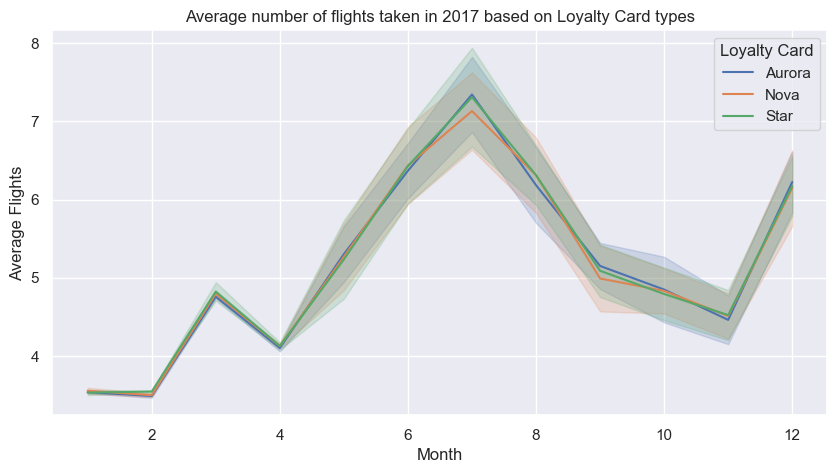

In [121]:
### Loyalty Tier wise number of flights booked over time (solo and companion)

df_tier_flights = df_member_flight.groupby(['Year','Month','Loyalty Card']).mean().reset_index()
df_tier_flights = df_tier_flights[['Year','Month','Loyalty Card','Total Flights']]
df_tier_flights.head()

plt.figure(figsize=(10,5))
sns.set_theme()
sns.lineplot(data = df_tier_flights,x='Month',y='Total Flights',hue='Loyalty Card')
plt.title('Average number of flights taken in 2017 based on Loyalty Card types')
plt.ylabel('Average Flights')

Text(0.5, 1.0, 'Average Flights booked over CLV')

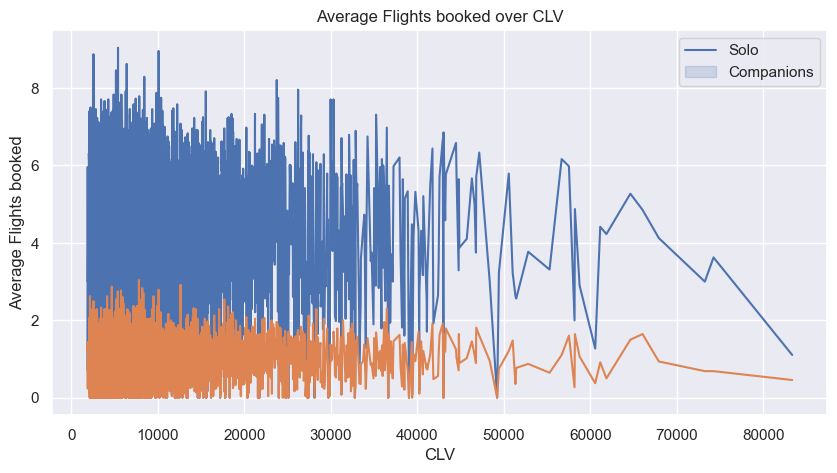

In [85]:
### Flights booked solo and vs companions over different CLV

df_cv_flights = df_member_flight[['CLV','Total Flights','Flights Booked','Flights with Companions']]
df_cv_flights = df_cv_flights.groupby('CLV').mean().reset_index()

plt.figure(figsize=(10,5))

sns.set_theme()
sns.lineplot(data=df_cv_flights,x='CLV',y='Flights Booked')
sns.lineplot(data=df_cv_flights,x='CLV',y='Flights with Companions')
plt.legend(['Solo','Companions'])
plt.ylabel('Average Flights booked')
plt.title('Average Flights booked over CLV')


Text(0.5, 1.0, 'Total Flights based on enrollment year')

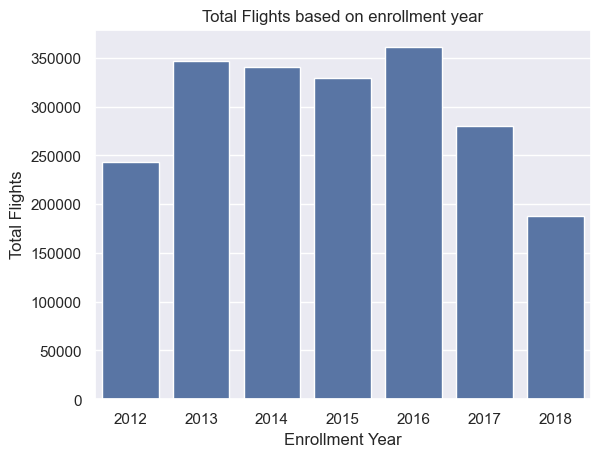

In [93]:
### Average number of flights booked by the year/month they enrolled

df_enroll_flights = df_member_flight[['Enrollment Year','Total Flights']]
df_enroll_flights = df_enroll_flights.groupby(['Enrollment Year']).sum().reset_index()

sns.barplot(data=df_enroll_flights,x='Enrollment Year',y='Total Flights')
plt.title('Total Flights based on enrollment year')

Text(0.5, 1.0, 'Average Flights based on enrollment year')

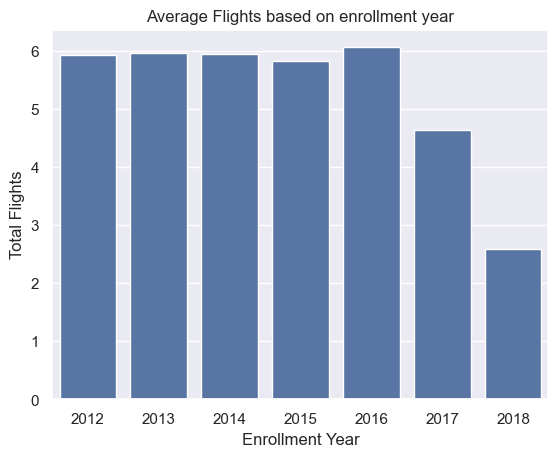

In [95]:
### Average number of flights booked by the year/month they enrolled

df_enroll_flights = df_member_flight[['Enrollment Year','Total Flights']]
df_enroll_flights = df_enroll_flights.groupby(['Enrollment Year']).mean().reset_index()

sns.barplot(data=df_enroll_flights,x='Enrollment Year',y='Total Flights')
plt.title('Average Flights based on enrollment year')

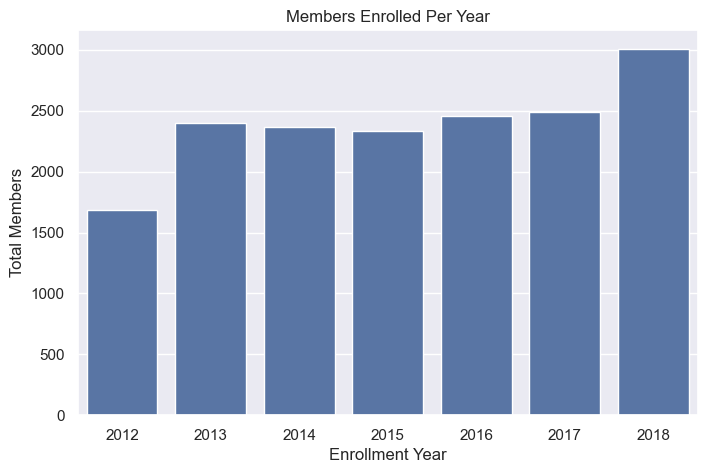

In [97]:
df_enrollment = df_member_flight.groupby("Enrollment Year")["Loyalty Number"].nunique().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=df_enrollment, x="Enrollment Year", y="Loyalty Number")
plt.title("Members Enrolled Per Year")
plt.ylabel('Total Members')
plt.show()


In [109]:
### Number of flights/distance travelled over time by cancelled members

df_cancelled = df_member_flight[df_member_flight['Cancellation Year'].notna()]

In [110]:
df_cancelled['Loyalty Card'].value_counts()

Loyalty Card
Star      21744
Nova      17376
Aurora    10944
Name: count, dtype: int64

<AxesSubplot: xlabel='Month', ylabel='Total Flights'>

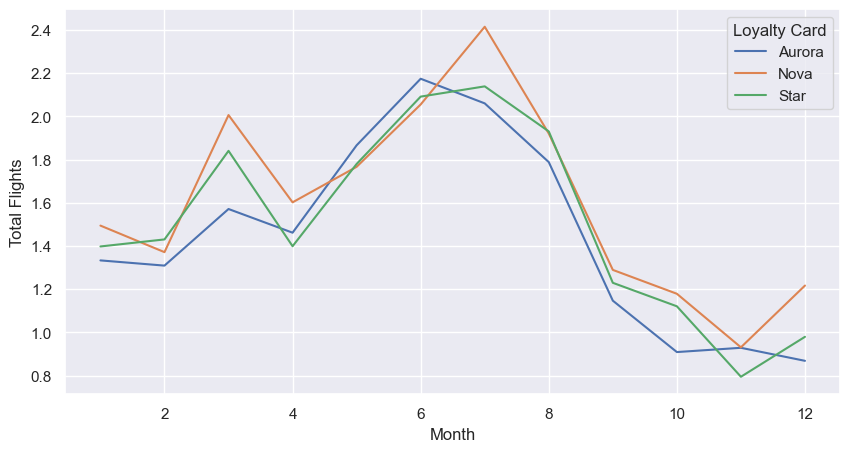

In [ ]:
df_cancelled_flight = df_cancelled[['Month','Total Flights','Loyalty Card']]
df_cancelled_flight = df_cancelled_flight.groupby(['Month','Loyalty Card']).mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=df_cancelled_flight,x='Month',y='Total Flights',hue='Loyalty Card')
plt.title('Average Flights Taken by Cancellend members')